### Treść zadania

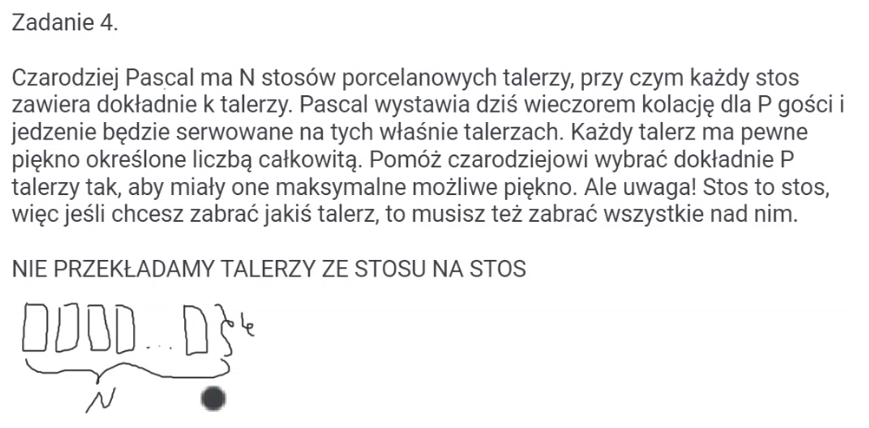

### Omówienie

Problem rozwiązujemy podobnie do problemu plecakowego. W tym przypadku nasza funkcja wygląda następująco: <br>
$ f(i, j) $ - maksymalne piękno wszystkich talerzy, jakie możemy wziąć ze stosów, zgodnie z opisanymi w treści zadania regułami, wybierając talerze dla $ j $ gości spośród stosów o indeksach $ 0, 1, ..., i $. ($ i $ jest numerem wiersza w tablicy $ F $, a $ j $ numerem kolumny w tej tablicy). 
<br><br>
Zauważmy, że rozważając stos o indeksie $ i $, mamy możliwość wzięcia poprzedniego najlepszego rozwiązania (dla poprzednich stosów o indeksach $ 0, 1, ..., i - 1 $) lub dobrania pewnej liczby talerzy z $ i $. stosu do wcześniej wybranych talerzy z poprzednich stosów. Zatem, konieczne jest sprawdzenie, kiedy uzyskamy największe sumaryczne piękno talerzy, iterując poprzez wszystkie możliwe liczby talerzy, jakie możemy wziąć ze stosu $ i $. Ponieważ nie możemy wziąć więcej talerzy niż jest na stosie, ani więcej niż liczba gości ($ j $ - indeks kolumny, oznacza liczbę gości), iterujemy po wszystkich wartościach, począwszy od wzięcia $ 1 $ talerza (nie sprawdzamy $ 0 $ osobno, bo jako przypadek bazowy traktujemy ten, w którym nie bierzemy nic z nowego stosu), aż do przypadku, gdy weźmiemy $ min(j, k) $ talerzy z tego stosu (w kodzie jest $ min(j, k) + 1 $, bo Python odrzuca ostatnią wartość w funkcji range, więc musimy ją dodać). W takiej sytuacji, dla każdej wartości $ k $ talerzy, wykonywana jest poniższa konstrukcja:

    F[i][j] = max(F[i][j], F[i - 1][j - t] + stacks[i][k - t])

Ta konstrukcja służy sprawdzeniu, czy zapisana obecnie wartość piękna jest największa, czy być może wartość, jaką wybraliśmy spośród $ i - 1 $ stosów dla $ j - t $ gości ($ F[i - 1][j - t] $) po dołożeniu do niej $ t $ talerzy ze stosu $ i $ <br>($ stacks[i][k - t] $) będzie większa (zbiór talerzy będzie miał większe sumaryczne piękno).

### Złożoność

$ O(k \cdot N \cdot P) $, gdzie $ N $ - liczba stosów, $ k $ - wielkość każdego stosu, $ P $ - liczba zaproszonych gości. (Mnożymy przez $ k $, bo dla każdej komórki tablicy $ F $ musimy rozważyć każdy przypadek, dotyczący wzięcia od $ 0 $ do $ k $ (włącznie) talerzy z ostatniego stosu spośród rozważanych w danym momencie stosów)
<br><br>
lub dokładniej:
<br><br>
$ O(min(k, P) \cdot N \cdot P) $, bo maksymalnie możemy ze stosu wziąć tyle talerzy, ile jest gości, jednakże nie więcej niż liczba wszystkich tależy na danym stosie (chodzi o wybór z jednego stosu, nie ze wszystkich)

### Implementacja

In [1]:
def map_stack_to_sum(stack: 'stack of plates'):
    # This function changes a stack in sucha way that 'i'th element from
    # a top has a value which is a sum o beauty of all the plates above
    # this element plus a beauty of an element itself (the current plate)
    for i in range(len(stack) - 2, -1, -1):
        stack[i] += stack[i + 1]
        
        
def beautiful_supper(stacks: 'stacks of plates', P: 'number of guests'):
    n = len(stacks)
    k = len(stacks[0])
    
    # If too many guests, return -1 as it's not possible to get enough plates
    if k * n < P: return -1
    
    F = [[0] * (P + 1) for _ in range(n)]
    # Prepare stacks
    for stack in stacks:
        map_stack_to_sum(stack)
        
    print(*stacks, sep='\n')
    # Rewrite the first stack (as if we choose only from the first stack, we will
    # get a total beauty of sum of all plates taken from this stack only)
    for j in range(1, min(P, k) + 1):
        F[0][j] = stacks[0][k - j]
        
    # Fill the remaining values
    for i in range(1, n):
        for j in range(1, P + 1):
            F[i][j] = F[i - 1][j]
            
            for t in range(1, min(j, k) + 1):
                F[i][j] = max(F[i][j], F[i - 1][j - t] + stacks[i][k - t])
        
    print()
    print(*F, sep='\n')
    
    return F[n - 1][P]

###### Kilka testów

In [2]:
plates = [
    [9, 0, 3, 2, 8, 1],
    [33, 20, 1, 0, 0, 3],
    [5, 9, 1, 8, 1, 10],
    [3, 4, 8, 2, 6, 7]
]
guests = 8

print('Stacks:', '\n'.join('   '.join(map(lambda v: f'{v:<3}', layer)) for layer in reversed(list(zip(*plates)))), sep='\n')
print()
print(beautiful_supper(plates, guests))

Stacks:
1     3     10    7  
8     0     1     6  
2     0     8     2  
3     1     1     8  
0     20    9     4  
9     33    5     3  

[23, 14, 14, 11, 9, 1]
[57, 24, 4, 3, 3, 3]
[34, 29, 20, 19, 11, 10]
[30, 27, 23, 15, 13, 7]

[0, 1, 9, 11, 14, 14, 23, 0, 0]
[0, 3, 9, 12, 14, 24, 57, 58, 66]
[0, 10, 13, 19, 22, 29, 57, 67, 68]
[0, 10, 17, 23, 26, 33, 57, 67, 74]
74


### (Dodatkowo) Pobieranie rozwiązania

In [3]:
def map_stack_to_sum(stack: 'stack of plates'):
    # This function changes a stack in sucha way that 'i'th element from
    # a top has a value which is a sum o beauty of all the plates above
    # this element plus a beauty of an element itself (the current plate)
    S = stack[:]
    for i in range(len(S) - 2, -1, -1):
        S[i] += S[i + 1]
    return S

        
def beautiful_supper(stacks: 'stacks of plates', P: 'number of guests'):
    n = len(stacks)
    k = len(stacks[0])
    
    # If too many guests, return -1 as it's not possible to get enough plates
    if k * n < P: return -1
    
    # Prepare an array for memoization and stacks beauty sums array
    F = [[0] * (P + 1) for _ in range(n)]
    S = [map_stack_to_sum(s) for s in stacks]
        
    # Rewrite the first stack (as if we choose only from the first stack, we will
    # get a total beauty of sum of all plates taken from this stack only)
    for j in range(1, min(P, k) + 1):
        F[0][j] = S[0][k - j]
        
    # Fill the remaining values
    for i in range(1, n):
        for j in range(1, P + 1):
            F[i][j] = F[i - 1][j]
            
            for t in range(1, min(j, k) + 1):
                F[i][j] = max(F[i][j], F[i - 1][j - t] + S[i][k - t])
    
    return F[n - 1][P], F, S


def get_plates_counts(F, S: 'mapped plates'):  # O(n^2)
    n = len(S)
    k = len(S[0])
    counts = [0] * n
    
    i = n - 1
    j = len(F[0]) - 1
    while i > 0:
        if F[i][j] != F[i - 1][j]:
            for t in range(1, k + 1):
#                 print(i, j, k - t, j - t)
#                 print('Vals', F[i][j], S[i][k - t], F[i - 1][j - t])
                if F[i][j] - S[i][k - t] == F[i - 1][j - t]:
                    counts[i] = t
                    j -= t
                    break
        i -= 1
    counts[0] = j
    
    return counts

###### Kilka testów

In [4]:
plates = [
    [9, 0, 3, 2, 8, 1],
    [33, 20, 1, 0, 0, 3],
    [5, 9, 1, 8, 1, 10],
    [3, 4, 8, 2, 6, 7]
]
guests = 17

print('Stacks:', '\n'.join('   '.join(map(lambda v: f'{v:<3}', layer)) for layer in reversed(list(zip(*plates)))), sep='\n')
beauty, F, S = beautiful_supper(plates, guests)
print('\nTotal beauty:', beauty, sep='\n')
print('Taken plates from stacks:')
print(get_plates_counts(F, S))

Stacks:
1     3     10    7  
8     0     1     6  
2     0     8     2  
3     1     1     8  
0     20    9     4  
9     33    5     3  

Total beauty:
118
Taken plates from stacks:
[2, 6, 5, 4]
